In [2]:
import time
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt


In [ ]:
train_dataset_path = '/content/drive/MyDrive/17Flowers/train'
width = height = 224
batch_size = 32

idg = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    brightness_range = (0.8,1.2),
    zoom_range = 0.1,
    shear_range = 0.3,
    rotation_range = 10,
    validation_split = 0.2
)

train_data = idg.flow_from_directory(
    train_dataset_path,
    target_size = (width,height),
    class_mode = "categorical",
    batch_size = batch_size,
    subset = "training"

)
val_data = idg.flow_from_directory(
    train_dataset_path,
    target_size = (width,height),
    class_mode = "categorical",
    batch_size = batch_size,
    subset = "validation"

)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


In [ ]:
model = tf.keras.models.Sequential([
  Conv2D(16,(3,3),activation='relu',strides=(2, 2),input_shape=(width,height,3)),
  Conv2D(32,(3,3),activation='relu',strides=(2, 2)),
  MaxPool2D(),
  Conv2D(64,(5,5),activation='relu',strides=(2, 2)),
  Conv2D(256,(3,3),activation='relu',strides=(2, 2)),
  MaxPool2D(),

  Flatten(),
  Dense(512,activation='relu'),
  Dense(64,activation='relu'),
  Dense(17,activation='softmax')
])

In [ ]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(lr=2e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_data,validation_data=val_data,epochs=20)


Epoch 1/20
26/26 [==============================] - 296s 11s/step - loss: 2.7263 - accuracy: 0.0887 - val_loss: 2.4782 - val_accuracy: 0.1371
Epoch 2/20
26/26 [==============================] - 20s 776ms/step - loss: 2.4112 - accuracy: 0.1810 - val_loss: 2.3463 - val_accuracy: 0.1980
Epoch 3/20
26/26 [==============================] - 22s 824ms/step - loss: 2.2068 - accuracy: 0.2066 - val_loss: 1.9769 - val_accuracy: 0.2893
Epoch 4/20
26/26 [==============================] - 20s 774ms/step - loss: 2.0328 - accuracy: 0.3111 - val_loss: 2.0456 - val_accuracy: 0.2690
Epoch 5/20
26/26 [==============================] - 21s 829ms/step - loss: 1.8960 - accuracy: 0.3621 - val_loss: 1.7901 - val_accuracy: 0.3706
Epoch 6/20
26/26 [==============================] - 20s 759ms/step - loss: 1.8017 - accuracy: 0.3621 - val_loss: 1.5574 - val_accuracy: 0.4010
Epoch 7/20
26/26 [==============================] - 21s 826ms/step - loss: 1.6535 - accuracy: 0.4289 - val_loss: 1.4351 - val_accuracy: 0.4315


In [4]:
test_dataset_path = '/content/drive/MyDrive/17Flowers/test'
width=height = 224
batch_size = 32
idg = ImageDataGenerator(
    rescale = 1./255,
)


test_data = idg.flow_from_directory(
    test_dataset_path,
    target_size = (width,height),
    class_mode = "categorical",
    batch_size = batch_size,
)

Found 340 images belonging to 17 classes.


In [ ]:
model.evaluate(test_data)


11/11 [==============================] - 82s 8s/step - loss: 1.1880 - accuracy: 0.6235


[1.1879751682281494, 0.6235294342041016]

In [ ]:
model.save('flowers.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
from keras.models import load_model
model = load_model('/content/flowers.h5')

11/11 [==============================] - 2s 167ms/step


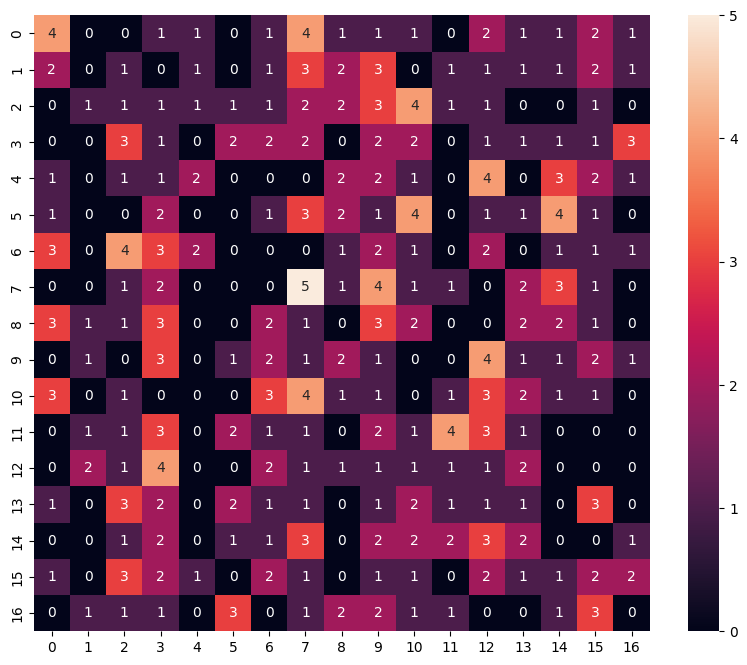

In [8]:
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
conf_mat = confusion_matrix(test_data.classes, y_pred)

fig, ax = plt.subplots(figsize=(10, 8))
sn.heatmap(conf_mat, annot=True,ax=ax)
plt.imshow(conf_mat)
